In [1]:
# Importing all required libraries:

import requests
from bs4 import BeautifulSoup

In [2]:
# creating url link variable for webscraping:

url = "https://www.empireonline.com/movies/features/best-movies-2/"

In [3]:
# Checking response of website autherization:

response = requests.get(url)
response

<Response [200]>

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="telephone=no" name="format-detection"/><link href="https://rss.onebauer.media/api/feed-aggregator?hostname=https://www.empireonline.com" rel="alternate" type="application/rss+xml"/><link href="https:https://assets.onebauer.media" rel="preconnect"/><link href="https://images.bauerhosting.com" rel="preconnect"/><link href="https://securepubads.g.doubleclick.net" rel="preconnect"/><link href="https://prebid.the-ozone-project.com/hw2/OZONEBAUP001/3500000499/current/ozpb.min.js" rel="preload"/><link href="https://securepubads.g.doubleclick.net/tag/js/gpt.js" rel="preload"/><script>
										window.googletag = window.googletag || {cmd: []};
										</script><meta content="max-image-preview:large" name="robots"/><link href="https://assets.onebauer.media/assets/empire/favicon.ico" rel="shortcut icon" type="image/x-icon"/><script>function _typeof(t){return(_typeof="function"==typeof Symbol&&"symbol"==typeof Symbol.it
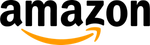
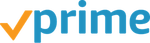

In [4]:
# Creating soup variable with the help of html parser:

soup = BeautifulSoup(response.content, "html.parser")
print(soup)

In [5]:
# Find the list of movies by inspecting the HTML structure: 

movie_list = soup.find_all('h3', class_="listicleItem_listicle-item__title__hW_Kn") #listicleItem_listicle-item__title__hW_Kn
print(movie_list)

[<h3 class="listicleItem_listicle-item__title__hW_Kn">100) Reservoir Dogs</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">99) Groundhog Day</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">98) Paddington 2</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">97) Amelie</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">96) Brokeback Mountain</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">95) Donnie Darko</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">94) Scott Pilgrim Vs. The World</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">93) Portrait Of A Lady On Fire</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">92) Léon</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">91) Logan</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">90) The Terminator</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">89) No Country For Old Men</h3>, <h3 class="listicleItem_listicle-item__title__hW_Kn">88) 

In [6]:
# Extracting the all text data and creating list:

extracted_text = []

# Loop through the ResultSet and extract text from the Tag objects
for tag in movie_list:
    text = tag.get_text().strip()
    extracted_text.append(text)

In [7]:
# Here is extracted text list:

extracted_text

['100) Reservoir Dogs',
 '99) Groundhog Day',
 '98) Paddington 2',
 '97) Amelie',
 '96) Brokeback Mountain',
 '95) Donnie Darko',
 '94) Scott Pilgrim Vs. The World',
 '93) Portrait Of A Lady On Fire',
 '92) Léon',
 '91) Logan',
 '90) The Terminator',
 '89) No Country For Old Men',
 '88) Titanic',
 '87) The Exorcist',
 '86) Black Panther',
 '85) Shaun Of The Dead',
 '84) Lost In Translation',
 '83) Thor: Ragnarok',
 '82) The Usual Suspects',
 '81) Psycho',
 '80) L.A. Confidential',
 '79) E.T. – The Extra Terrestrial',
 '78) In The Mood For Love',
 '77) Star Wars: Return Of The Jedi',
 '76) Arrival',
 '75) A Quiet Place',
 '74) Trainspotting',
 '73) Mulholland Drive',
 '72) Rear Window',
 '71) Up',
 '70) Spider-Man: Into The Spider-Verse',
 '69) Inglourious Basterds',
 '68) Lady Bird',
 "67) Singin' In The Rain",
 "66) One Flew Over The Cuckoo's Nest",
 '65) Seven Samurai',
 '64) La La Land',
 '63) Get Out',
 '62) Lawrence Of Arabia',
 "61) Pan's Labyrinth",
 '60) Hot Fuzz',
 '59) Moonli

In [8]:
# As you can see type of the extracted data format:

print(type(extracted_text))

<class 'list'>


In [9]:
# Again importing all required libraries for creating neat dataframe:

import re

import pandas as pd

In [10]:
# Creating dataframe with help of pandas:

df = pd.DataFrame({"The 100 Best Movies Of All Time":extracted_text})
df

The 100 Best Movies Of All Time
0                                 100) Reservoir Dogs
1                                   99) Groundhog Day
2                                    98) Paddington 2
3                                          97) Amelie
4                              96) Brokeback Mountain
..                                                ...
95                        5) The Shawshank Redemption
96                                 4) The Dark Knight
97                                   3) The Godfather
98              2) Star Wars: The Empire Strikes Back
99  1) The Lord Of The Rings: The Fellowship Of Th...

[100 rows x 1 columns]

In [11]:
# Reset the index starting from 1:

df.reset_index(drop=True, inplace=True)
df.index += 1

# Rename the index column to 'Rank'
df.index.name = 'Rank'
df

The 100 Best Movies Of All Time
Rank                                                   
1                                   100) Reservoir Dogs
2                                     99) Groundhog Day
3                                      98) Paddington 2
4                                            97) Amelie
5                                96) Brokeback Mountain
...                                                 ...
96                          5) The Shawshank Redemption
97                                   4) The Dark Knight
98                                     3) The Godfather
99                2) Star Wars: The Empire Strikes Back
100   1) The Lord Of The Rings: The Fellowship Of Th...

[100 rows x 1 columns]

In [12]:
# Creating a function for removing pstarting_digits_and_parentheses with the help of regular expression:

def remove_starting_digits_and_parentheses(item):
    # Use regular expressions to remove starting digits and any text within parentheses
    cleaned_item = re.sub(r'^\d+\)\s*', '', item).strip()
    return cleaned_item

In [13]:
# Applying function as we can see difference:

df['The 100 Best Movies Of All Time'] = df['The 100 Best Movies Of All Time'].apply(remove_starting_digits_and_parentheses)

# Print the DataFrame
print(df)

                        The 100 Best Movies Of All Time
Rank                                                   
1                                        Reservoir Dogs
2                                         Groundhog Day
3                                          Paddington 2
4                                                Amelie
5                                    Brokeback Mountain
...                                                 ...
96                             The Shawshank Redemption
97                                      The Dark Knight
98                                        The Godfather
99                   Star Wars: The Empire Strikes Back
100   The Lord Of The Rings: The Fellowship Of The Ring

[100 rows x 1 columns]


In [14]:
# Still dataframe is in descending order:

df

The 100 Best Movies Of All Time
Rank                                                   
1                                        Reservoir Dogs
2                                         Groundhog Day
3                                          Paddington 2
4                                                Amelie
5                                    Brokeback Mountain
...                                                 ...
96                             The Shawshank Redemption
97                                      The Dark Knight
98                                        The Godfather
99                   Star Wars: The Empire Strikes Back
100   The Lord Of The Rings: The Fellowship Of The Ring

[100 rows x 1 columns]

In [15]:
# Arranging dataframe into ascending order by help with Rank:

# Sort the DataFrame in ascending order by the 'Rank' column
df = df.sort_values(by='Rank', ascending=False)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Print the sorted DataFrame
print(df)

                      The 100 Best Movies Of All Time
0   The Lord Of The Rings: The Fellowship Of The Ring
1                  Star Wars: The Empire Strikes Back
2                                       The Godfather
3                                     The Dark Knight
4                            The Shawshank Redemption
..                                                ...
95                                 Brokeback Mountain
96                                             Amelie
97                                       Paddington 2
98                                      Groundhog Day
99                                     Reservoir Dogs

[100 rows x 1 columns]


In [16]:
# Again reseting dataframe to Rank 1 to 100 as we want:

# Reset the index starting from 1
df.reset_index(drop=True, inplace=True)
df.index += 1

# Rename the index column to 'Rank'
df.index.name = 'Rank'

In [17]:
 # Here we can see new dataframe with organized manner:

df

The 100 Best Movies Of All Time
Rank                                                   
1     The Lord Of The Rings: The Fellowship Of The Ring
2                    Star Wars: The Empire Strikes Back
3                                         The Godfather
4                                       The Dark Knight
5                              The Shawshank Redemption
...                                                 ...
96                                   Brokeback Mountain
97                                               Amelie
98                                         Paddington 2
99                                        Groundhog Day
100                                      Reservoir Dogs

[100 rows x 1 columns]

In [18]:
# Starting 50 movies with rank:

df.head(50)

The 100 Best Movies Of All Time
Rank                                                   
1     The Lord Of The Rings: The Fellowship Of The Ring
2                    Star Wars: The Empire Strikes Back
3                                         The Godfather
4                                       The Dark Knight
5                              The Shawshank Redemption
6                                                  Jaws
7                                          Pulp Fiction
8                                Avengers: Infinity War
9                               Raiders Of The Lost Ark
10                                           Goodfellas
11                                            Star Wars
12                                   Mad Max: Fury Road
13                                   Back To The Future
14                                The Godfather Part II
15                                        Jurassic Park
16                                         Blade Runner
17                                               Aliens
18                                             Parasite
19                                            Inception
20                                           The Matrix
21                                                Alien
22                                    Avengers: Endgame
23                                2001: A Space Odyssey
24                            Terminator 2 Judgment Day
25                                           Fight Club
26                                             Die Hard
27         The Lord Of The Rings The Return Of The King
28                   Indiana Jones And The Last Crusade
29                                       Apocalypse Now
30                                                 Heat
31                                         Interstellar
32                                            The Thing
33                                           Casablanca
34                The Lord Of The Rings: The Two Towers
35                                          The Shining
36                Eternal Sunshine Of The Spotless Mind
37                                                Se7en
38                       The Good, The Bad And The Ugly
39                                            Gladiator
40                                         Citizen Kane
41                             The Silence Of The Lambs
42                                         12 Angry Men
43                                  There Will Be Blood
44                                It's A Wonderful Life
45                                     The Big Lebowski
46                                     Schindler's List
47                                   Do The Right Thing
48                                         Ghostbusters
49                                        Spirited Away
50                                              Vertigo

In [19]:
# last 50 movies with rank:

df.tail(50)

The 100 Best Movies Of All Time
Rank                                   
51                             Whiplash
52                          Point Break
53                         Forrest Gump
54                  Saving Private Ryan
55                          Taxi Driver
56                   The Social Network
57                    Blade Runner 2049
58              Guardians Of The Galaxy
59                            Moonlight
60                             Hot Fuzz
61                      Pan's Labyrinth
62                   Lawrence Of Arabia
63                              Get Out
64                           La La Land
65                        Seven Samurai
66      One Flew Over The Cuckoo's Nest
67                  Singin' In The Rain
68                            Lady Bird
69                 Inglourious Basterds
70    Spider-Man: Into The Spider-Verse
71                                   Up
72                          Rear Window
73                     Mulholland Drive
74                        Trainspotting
75                        A Quiet Place
76                              Arrival
77        Star Wars: Return Of The Jedi
78                 In The Mood For Love
79         E.T. – The Extra Terrestrial
80                    L.A. Confidential
81                               Psycho
82                   The Usual Suspects
83                       Thor: Ragnarok
84                  Lost In Translation
85                    Shaun Of The Dead
86                        Black Panther
87                         The Exorcist
88                              Titanic
89               No Country For Old Men
90                       The Terminator
91                                Logan
92                                 Léon
93           Portrait Of A Lady On Fire
94          Scott Pilgrim Vs. The World
95                         Donnie Darko
96                   Brokeback Mountain
97                               Amelie
98                         Paddington 2
99                        Groundhog Day
100                      Reservoir Dogs

In [20]:
# Calling csv function to covert this dataframe into csv format:

df.to_csv('Webscraping The 100 Best Movies Of All Time [Evoastra]')